## Exercise 10 - Decision tree

- Use the same dataset as in previous exercises (ex08 and ex09) (can be downloaded [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv))
- Dataset includes male and female voice samples with different features
- In this exercise you will use supervised machine learning method called decision tree for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. Filter dataframe for meanfun and IQR columns only.

In [1]:
import pandas as pd
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("voice.csv")
filtered_df = df[["meanfun","IQR"]]

filtered_df

,meanfun,IQR
0,0.084279,0.075122
1,0.107937,0.073252
2,0.098706,0.123207
3,0.088965,0.111374
4,0.106398,0.127325
...,...,...
3163,0.182790,0.151859
3164,0.188980,0.162193
3165,0.209918,0.190936
3166,0.172375,0.176435


2 Divide the data with the following portions:
   - Training data 70 %
   - Test data 30 %

In [2]:
x = filtered_df.to_numpy()[:, 1:3].astype(float)
y = df[["label"]].replace({"label":{"male": 0, "female":1}})

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

3 Define classifier without the max_depth parameter. Use get_depth() method for the defined classifier. What value for tree depth was chosen automatically?

In [3]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
clf.get_depth()

42

4 Visualise the tree structure and create the confusion matrix where you can compare true and predicted labels.

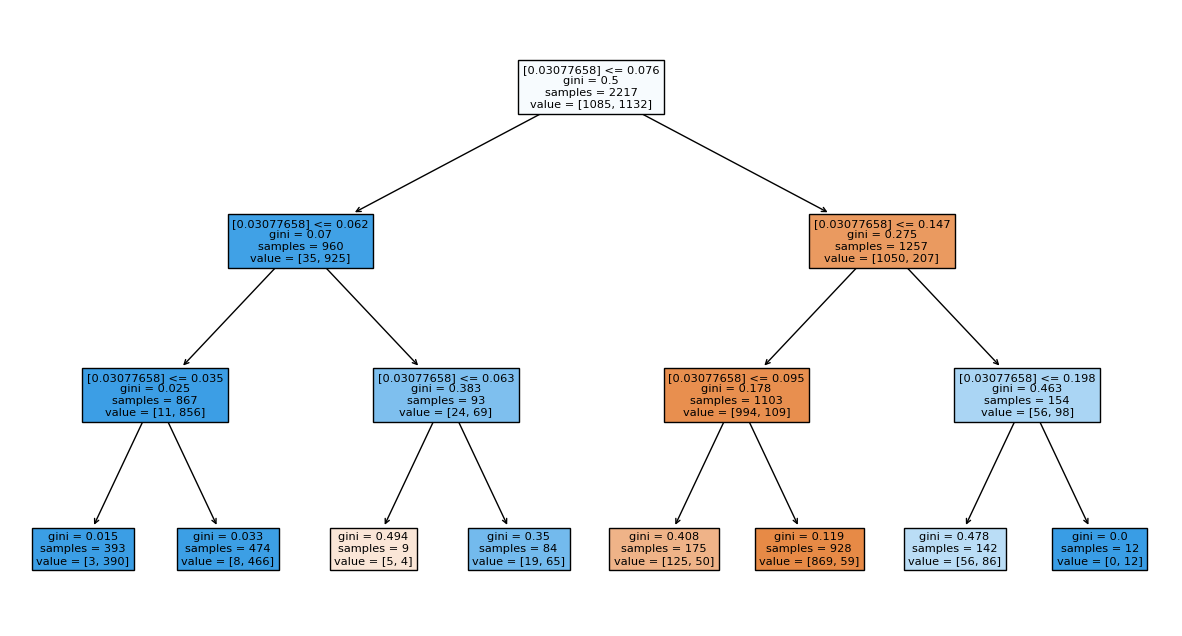

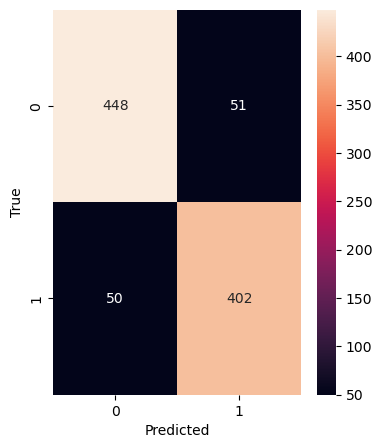

In [13]:
clf = DecisionTreeClassifier(max_depth=3, random_state = 42)
clf.fit(x_train, y_train)
clf.get_depth()

plt.figure(figsize=(15,8))
plot_tree(clf, filled=True, feature_names=x_test)
plt.show()

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()